In [137]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

parameters = {
    "l": 1,  # m - Lengden av snora
    "g": 9.8,  # m/s^2 - Tyngdeakselerasjon
    "theta_0": 0.2,  # rad - Initial vinkel med hensyn til vertikalen
    "theta_dot_0": 0.0,  # rad/s - Initial vinkelhastighet
    "q": 1.0,  # Hz - Friksjonsparameter
    "omega_D": 3.13,  # rad/s - FD_mlens vinkelfrekvens
    "FD_ml": 0.2,  # s^-2 - FD_ml
    "T": 20 # s - Tidsintervall
}


### Oppgave 1:
Bruk fjørne ordenens Runge-Kutta (RK4) metiden fir å løse bevegelseslikningen. Plot vinkelutslaget som funksjon av tid, opp til $t = 20s$. Bruk tidssteg $\Delta t = 0.01s$

In [138]:

newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams) # Updates the parametere set above. 

#RK4 metode kopiert fra tidligere numerisk øving

def equation(t, params, vals): 
    """
    Calculates the RHS of the differential equations given an array (vals) which contains the parameters

    Parameters
    -----------
    t: (float) time
    vals: (array) values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()
    
    theta, omega = vals
    dtheta = omega
    domega = -q * omega - (g/l) * theta + FD_ml * np.sin(omega_D*t) #Endringer her siden det er flere variabler
    return np.array([dtheta, domega])

def RK4_step(RHS, params, vals, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (numpy array) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """
    k1 = RHS(t, params, vals)   
    k2 = RHS(t+dt/2, params, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, params, vals+(dt/2)*k2)
    k4 = RHS(t+dt, params, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(RHS, params, dt):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()

    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(RHS, params, np.array([theta[i], w[i]]), t[i], dt) 
        # Calculates values of theta and omega using RK4-method
        
    return theta, w, t

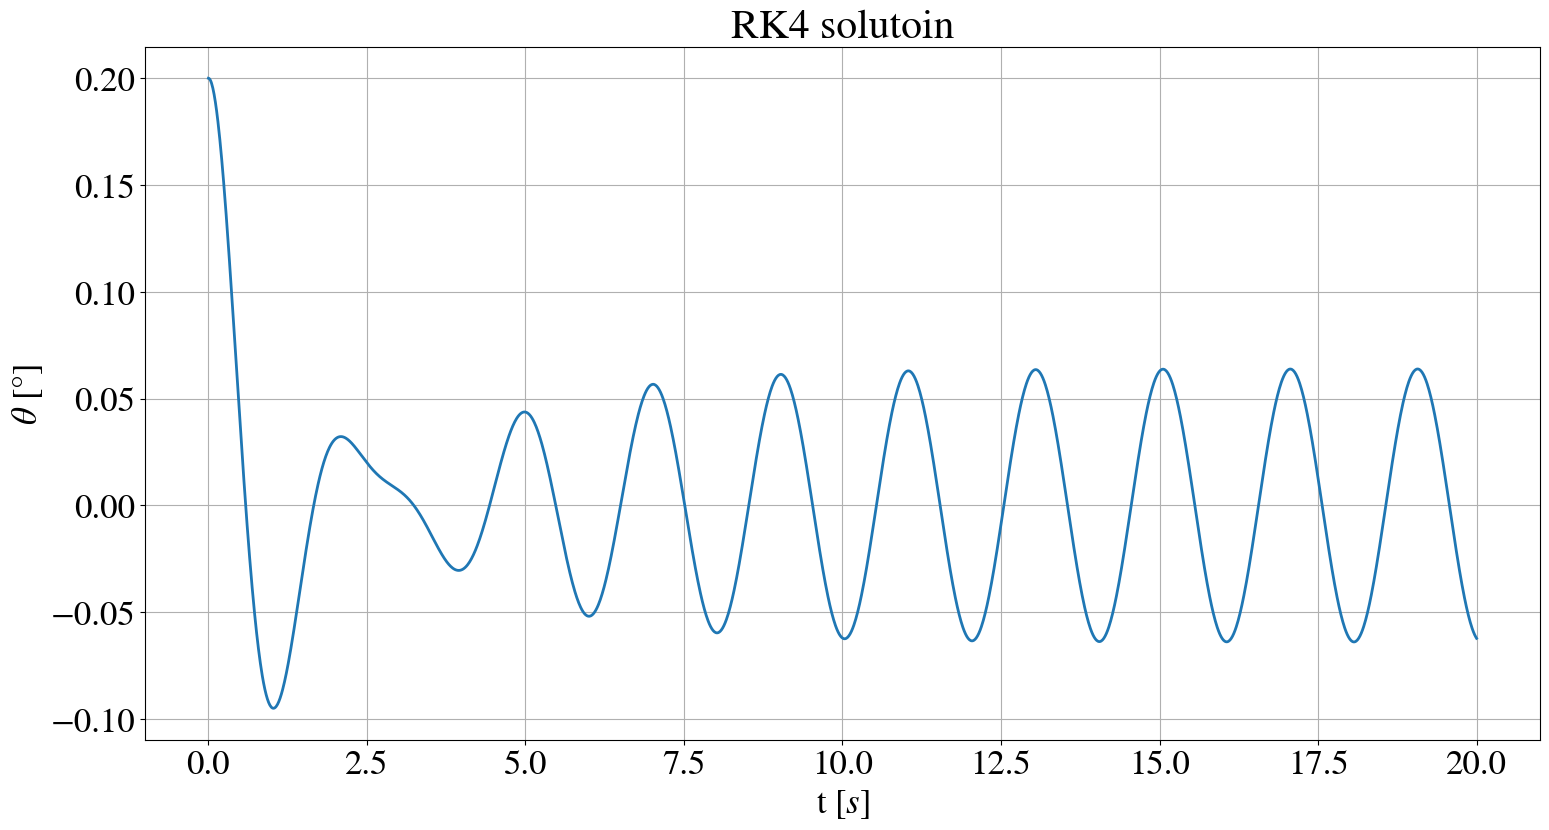

In [139]:
theta_R, w_r, t = RK4_method(equation, parameters, dt=0.01)

plt.plot(t, theta_R)
plt.title('RK4 solutoin')
plt.xlabel(r't $[s]$')
plt.ylabel(r'$\theta$ $[\degree]$')
plt.grid()
plt.show()

### Oppgave 2:
Finn en passende steglengde, $\Delta t$, ved å utføre en konvergenstest av løsningen fra RK4-metoden. Utfør den samme konvergenstesten for Euler-Cromer metoden, som du også må implementere. Plot de to konvergenstestene i hver sin figur. Vurder ut fra konvergenstesten om tidssteget brukt i oppgave 1 var tilstrekkelig. Merk at energien $\textit{ikke}$ vil være bevart i dette systemet.

In [140]:
def euler_cromer_step(RHS, params, vals, t, dt):
    """
    Calculates one step of the euler_cromer-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (list) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """

    w_next = vals[1] + RHS(t, params, vals)[1] * dt
    theta_next = vals[0] + w_next * dt # uses w_next instead of w

    return theta_next, w_next

def euler_cromer(RHS, params, dt):
    """
    Computes theta and w (omega).

    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()


    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0

    for i in range(n):
        theta[i+1], w[i+1] = euler_cromer_step(RHS, params, [theta[i], w[i]], t[i], dt)


    return theta, w, t



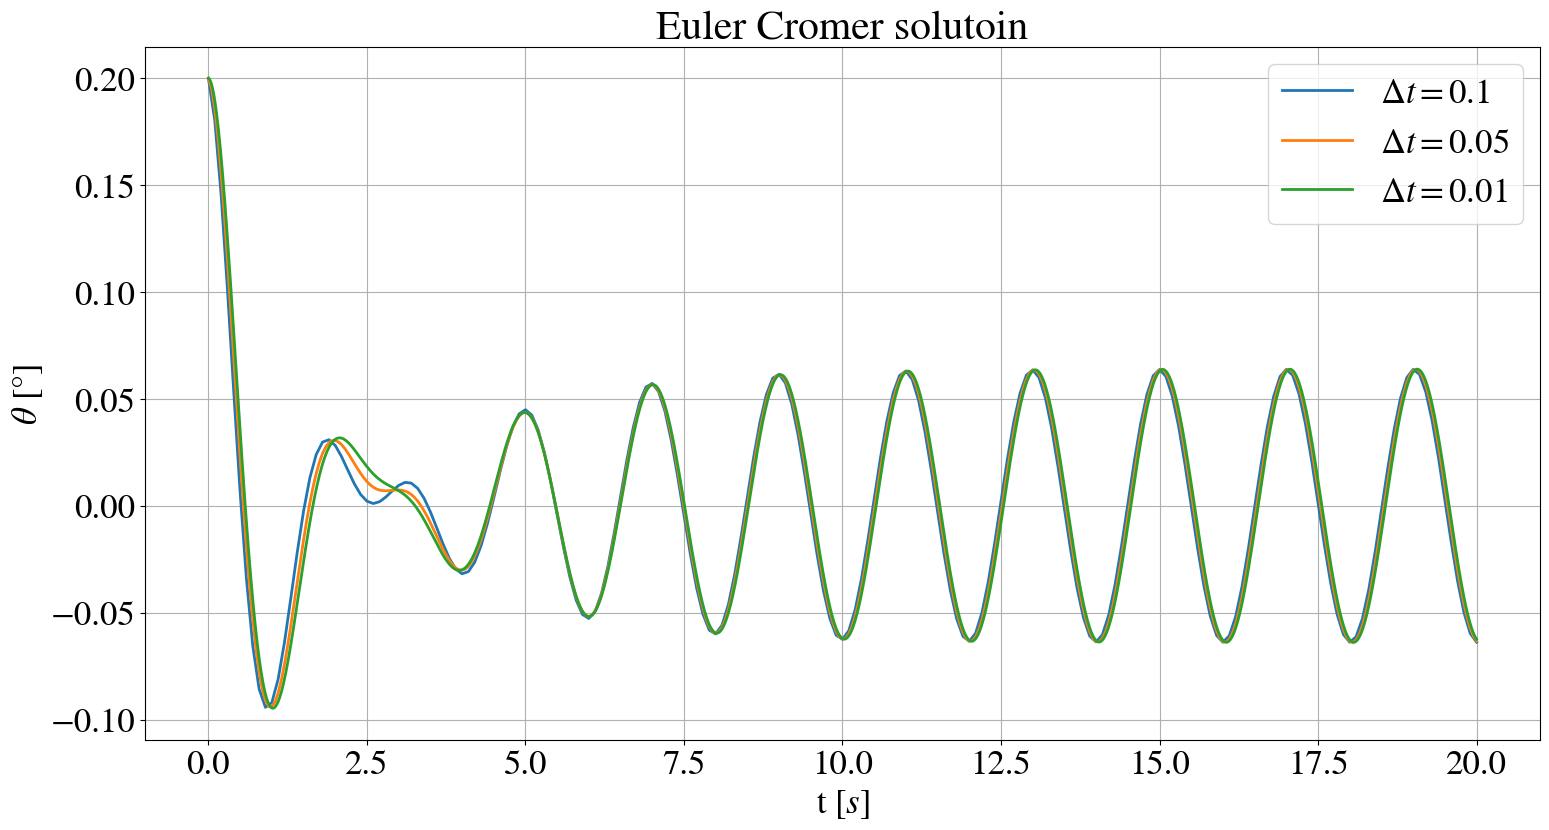

In [141]:
for dt in [0.1, 0.05, 0.01]:
    theta_R, w_r, t = euler_cromer(equation, parameters, dt=dt)

    plt.plot(t, theta_R, label=r"$\Delta t = $" + str(dt))
    plt.title(f'Euler Cromer solutoin')

    
    plt.xlabel(r't $[s]$')
    plt.ylabel(r'$\theta$ $[\degree]$')
    plt.legend()
    plt.grid()
plt.show()

In [ ]:
def generate_solutions(method, params, dt_max, dt_min, N):
    '''
    Generates N solutions

    Parameters
    -----------
    method: Method of obtaining solution
    params: Methods params
    dt_max: Highest dt-value
    dt_min: Lowest dt_value
    N: Number of solutions
    
    returns solutions and dt-values
    '''

    l, g, theta_0, theta_dot_0, q, omega_D, FD_ml, T = params.values()

    RHS, theta_0, theta_dot_0, T = params

    sols = []
    dts = np.logspace(np.log10(dt_max),np.log10(dt_min), N)
    
    for dt in dts:
        sols.append(method(RHS, theta_0, theta_dot_0, T, dt))
    return sols, dts


def compare_thetas(sol1, sol2):
    '''
    Compares to solutions to the system, by interpolating the solution with highest dt on the ohter solution's t-values.
    Calculates simularity score (mean absolute error).

    Parameters
    -----------
    sol1 (tuple): theta, w (omega) and t-values for 1st solution
    sol2 (tuple): theta, w (omega) and t-values for 2nd solution
    
    return simulatity_score
    '''

    if len(sol1[0])<len(sol2[0]):
        theta_1, _, t_1 = sol1
        theta_2, _, t_2 = sol2
    else:
        theta_1, _, t_1 = sol2
        theta_2, _, t_2 = sol1

    theta_1 = np.interp(t_2, t_1, theta_1)

    return np.mean(np.abs(theta_1-theta_2)) # return np.max(np.abs(theta_1-theta_2))

    
def compare_solutions(sols, dts):
    '''
    Compares multiple solutions to the system and graphs simularity score.

    Parameters
    -----------
    sols (tuple): list of solutions
    dts (tuple): list of dt-values

    return simulatity_scores
    '''


    scores = np.zeros(len(dts)-1)

    for i in range(len(dts)-1):
        scores[i] = compare_thetas(sols[i],sols[i+1])
    
    
    '''plt.plot(dts[1:], scores, label=r"$\Del$")
    plt.title(f'Convergence test')
    plt.xlabel(r't $[s]$')
    plt.ylabel(r'MAE of sol $\Delta_{i}$ vs $\Delta_{i-1}$' )
    plt.legend()
    plt.grid()
    plt.plot()'''
        
    return scores, dts

    #return scores
    



<>:70: SyntaxWarning: invalid escape sequence '\D'
<>:70: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Oliver\AppData\Local\Temp\ipykernel_21296\1685364190.py:70: SyntaxWarning: invalid escape sequence '\D'
  '''plt.plot(dts[1:], scores, label=r"$\Del$")


In [143]:
params = (equation, theta_0, theta_dot_0, 20)
dt_max = 0.5
dt_min = 0.0005
N = 100
T = 20

RK4_sols, RK4_dts = generate_solutions(RK4_method, params, dt_max, dt_min, N)
EC_sols, EC_dts = generate_solutions(euler_cromer, params, dt_max, dt_min, N)

C:\Users\Oliver\AppData\Local\Temp\ipykernel_21296\1685364190.py:70: SyntaxWarning: invalid escape sequence '\D'
  '''plt.plot(dts[1:], scores, label=r"$\Del$")


TypeError: RK4_method() takes 3 positional arguments but 5 were given

In [ ]:
scores, dts = compare_solutions(RK4_sols, RK4_dts)

[]

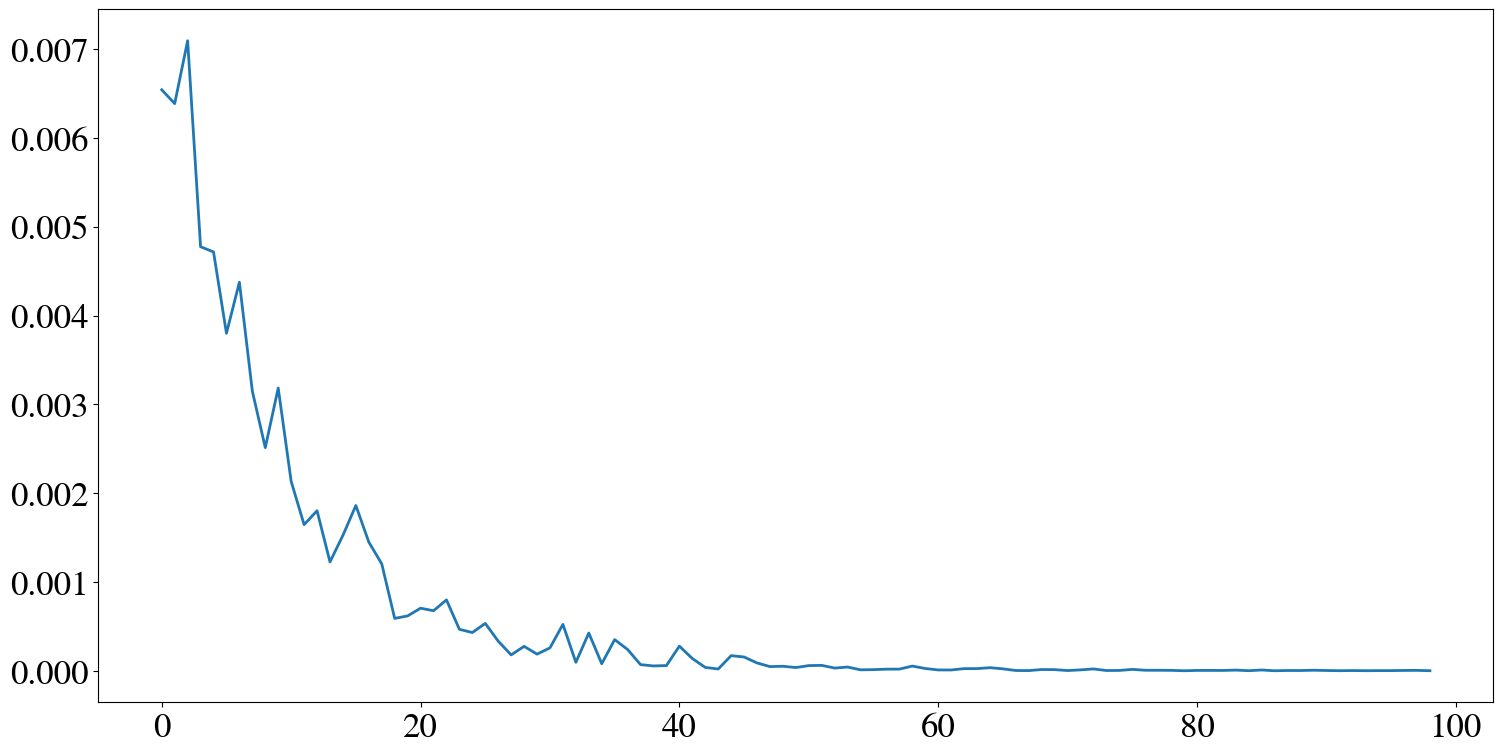

In [ ]:
plt.plot([i for i in range(len(scores))], scores)
plt.plot()

### Oppgave 4:
Undersøk hvordan resonansamplituden avhenger av friksjonsparameteren, $\textit{q}$. Plot vinkelutslaget for minst fem ulike verdier av $\textit{q}$, som du mener viser denne sammen-hengen

In [ ]:
params = {'theta_0': 0, 'FD_ml': 10}